In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


## 先觀察資料

In [4]:
app_train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [5]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
featureNum_mean = app_train.select_dtypes(exclude=["object"]).apply(pd.Series.mean,axis = 0)
print(f"各數值欄位平均數: \n\n {featureNum_mean}")

各數值欄位平均數: 

 SK_ID_CURR                     278180.518577
TARGET                              0.080729
CNT_CHILDREN                        0.417052
AMT_INCOME_TOTAL               168797.919297
AMT_CREDIT                     599025.999706
AMT_ANNUITY                     27108.573909
AMT_GOODS_PRICE                538396.207429
REGION_POPULATION_RELATIVE          0.020868
DAYS_BIRTH                     -16036.995067
DAYS_EMPLOYED                   63815.045904
DAYS_REGISTRATION               -4986.120328
DAYS_ID_PUBLISH                 -2994.202373
OWN_CAR_AGE                        12.061091
FLAG_MOBIL                          0.999997
FLAG_EMP_PHONE                      0.819889
FLAG_WORK_PHONE                     0.199368
FLAG_CONT_MOBILE                    0.998133
FLAG_PHONE                          0.281066
FLAG_EMAIL                          0.056720
CNT_FAM_MEMBERS                     2.152665
REGION_RATING_CLIENT                2.052463
REGION_RATING_CLIENT_W_CITY         2.0315

In [8]:
featureNum_std = app_train.select_dtypes(exclude=["object"]).apply(pd.Series.std,axis=0)
print(f"各數值變數標準差: \n {featureNum_std}")

各數值變數標準差: 
 SK_ID_CURR                     102790.175348
TARGET                              0.272419
CNT_CHILDREN                        0.722121
AMT_INCOME_TOTAL               237123.146279
AMT_CREDIT                     402490.776996
AMT_ANNUITY                     14493.737315
AMT_GOODS_PRICE                369446.460540
REGION_POPULATION_RELATIVE          0.013831
DAYS_BIRTH                       4363.988632
DAYS_EMPLOYED                  141275.766519
DAYS_REGISTRATION                3522.886321
DAYS_ID_PUBLISH                  1509.450419
OWN_CAR_AGE                        11.944812
FLAG_MOBIL                          0.001803
FLAG_EMP_PHONE                      0.384280
FLAG_WORK_PHONE                     0.399526
FLAG_CONT_MOBILE                    0.043164
FLAG_PHONE                          0.449521
FLAG_EMAIL                          0.231307
CNT_FAM_MEMBERS                     0.910682
REGION_RATING_CLIENT                0.509034
REGION_RATING_CLIENT_W_CITY         0.50273

In [9]:
import seaborn as sns 
sns.set() 

In [10]:
featureInt = app_train.select_dtypes(include=["int64"])
featureInt.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Int變數 視覺化:直方圖

D:\ProgramData\Anaconda3\envs\ML_DAY100\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


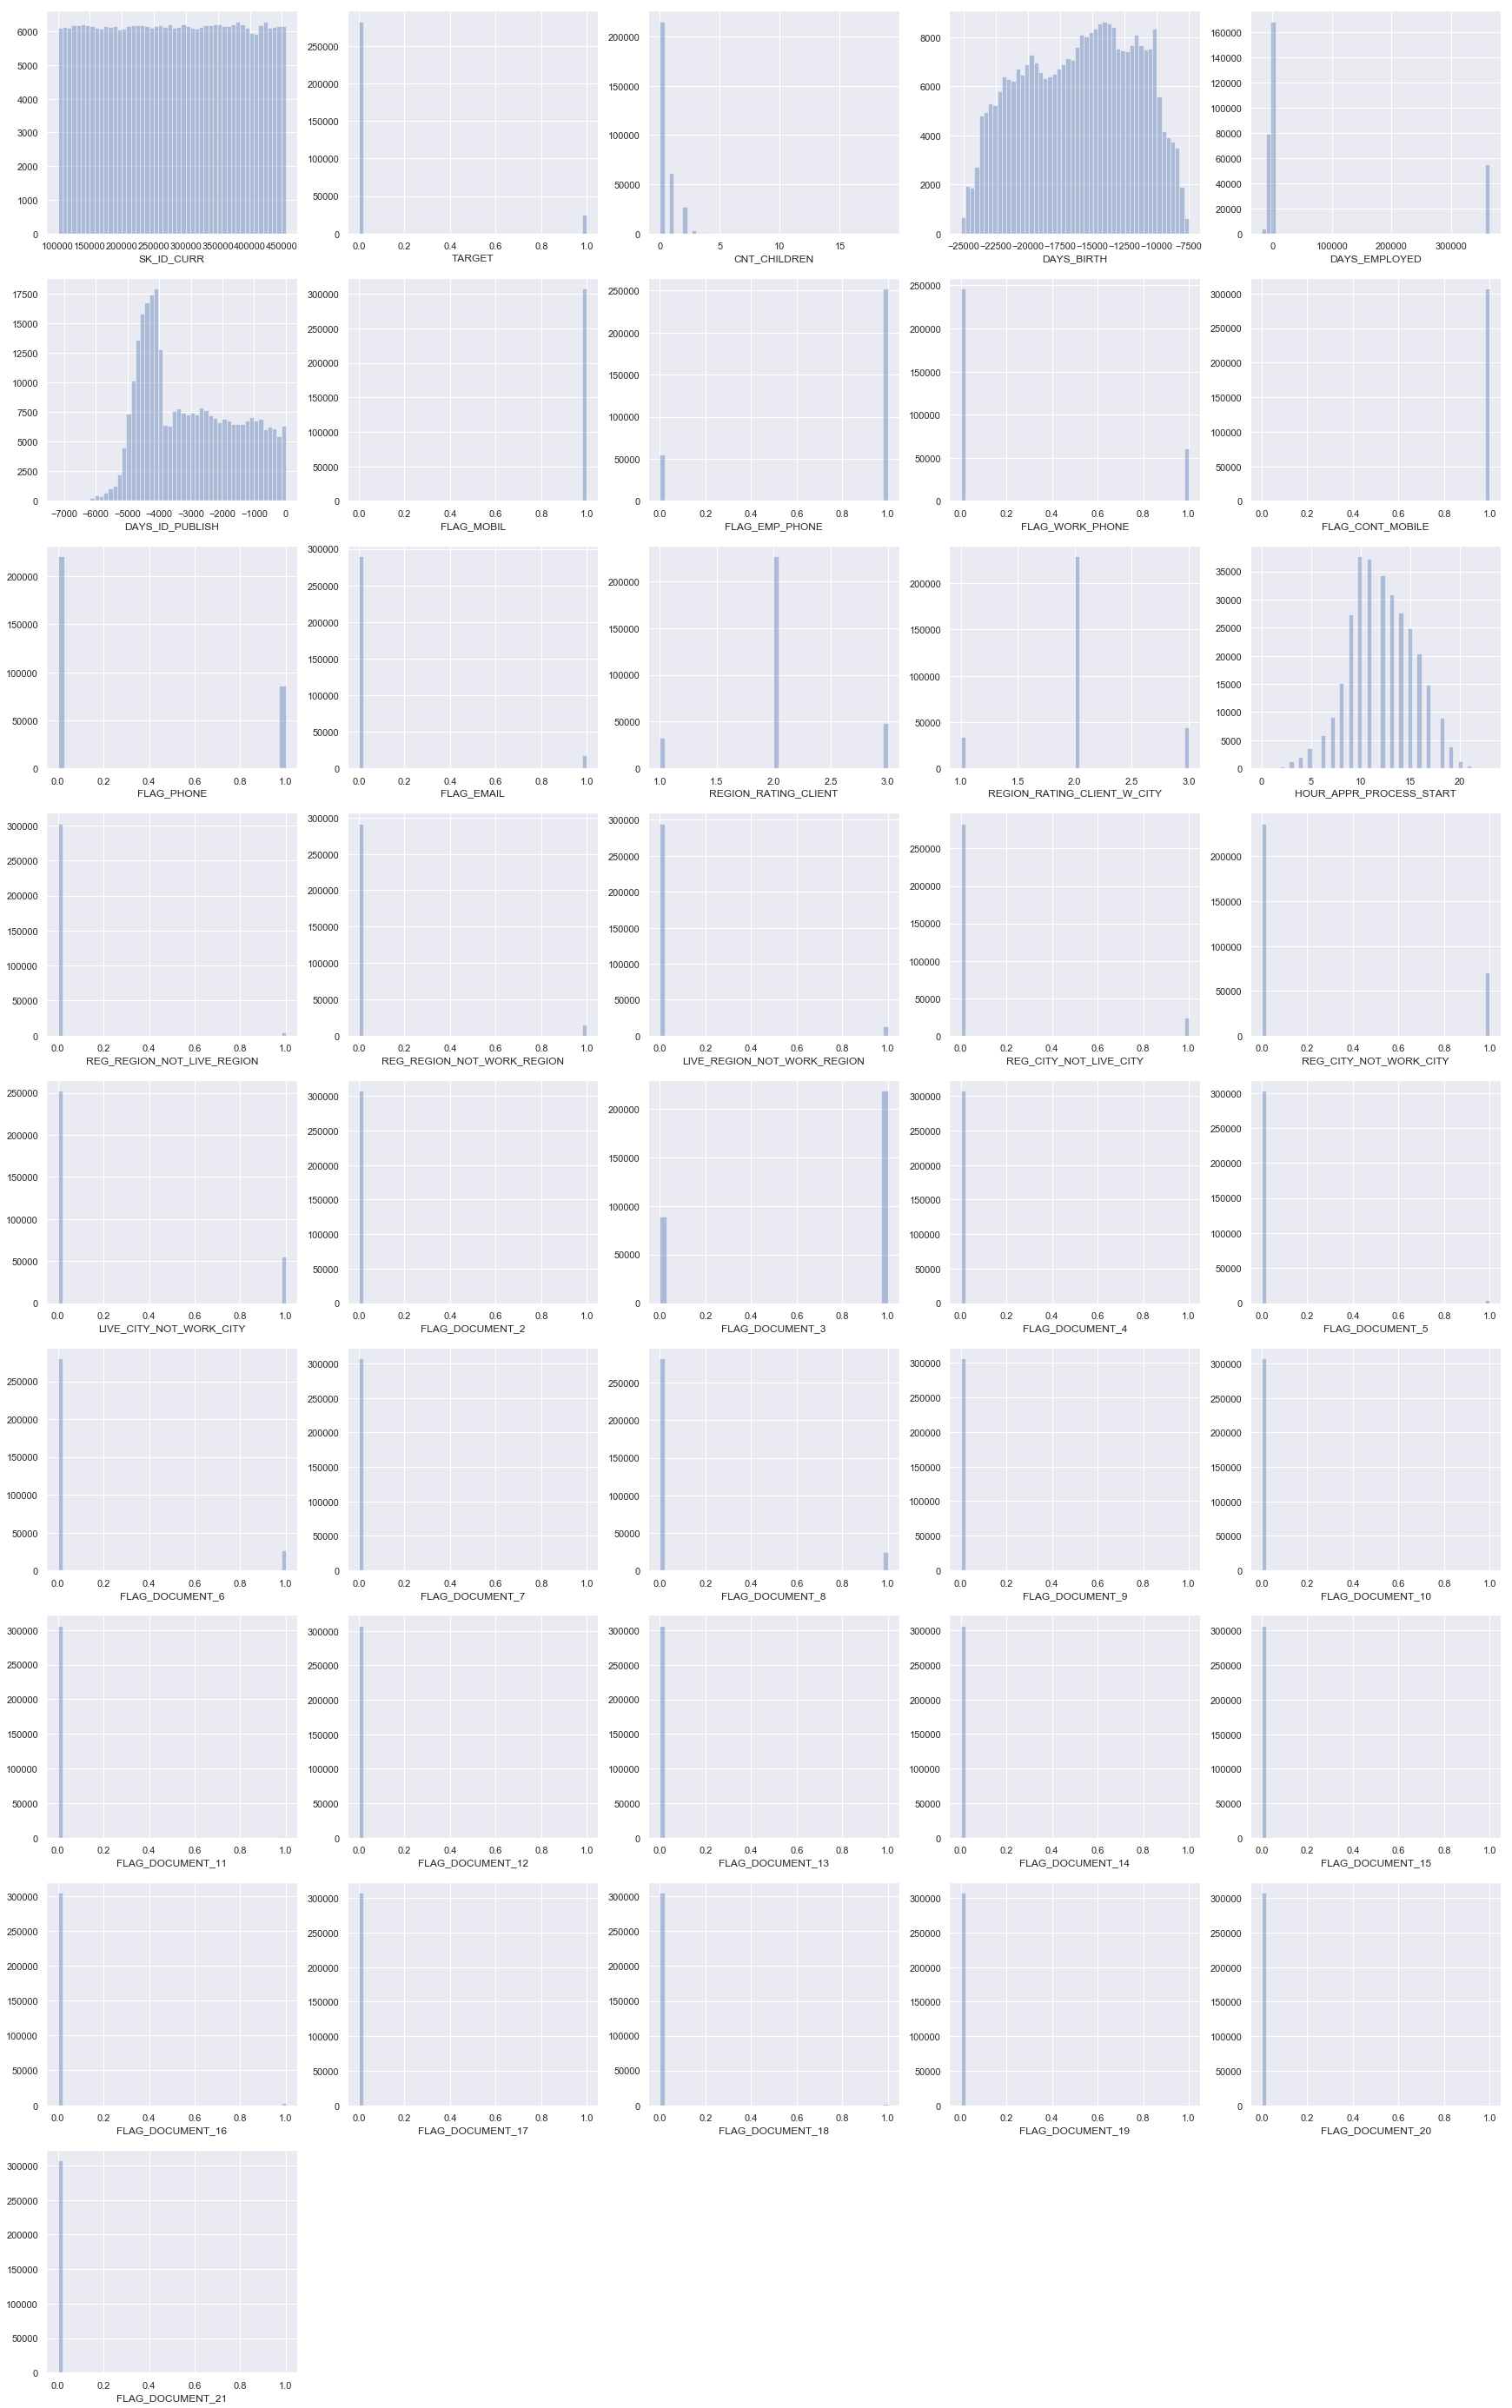

In [11]:
# Int變數 視覺化:直方圖 
col_Iplt = 5
row_Iplt = int(featureInt.shape[1]/col_Iplt)+1
fig,axes=plt.subplots(row_Iplt,col_Iplt,figsize=(30, 50))
r = 0
for i in range(row_Iplt*col_Iplt):
    c = i%col_Iplt
    if i<featureInt.shape[1]:
        try:
            sns.distplot(featureInt.iloc[:,i],kde=False,ax = axes[r,c])
        except:
            axes[r, c].set_visible(False)
            print(f"第{i}特徵:{featureInt.iloc[:,i].name} 型別:{featureInt.iloc[:,i].dtype} 無法畫圖")
    else:
        axes[r, c].set_visible(False)

    if c==(col_Iplt-1):
        r +=1

In [12]:
featureFloat = app_train.select_dtypes(include=["float64"])
featureFloat.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


## Float特徵 視覺化:直方圖

當無法畫圖時遞補，最後刪除無用的圖紙

D:\ProgramData\Anaconda3\envs\ML_DAY100\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
D:\ProgramData\Anaconda3\envs\ML_DAY100\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


第2特徵:AMT_ANNUITY 型別:float64 無法畫圖
第3特徵:AMT_GOODS_PRICE 型別:float64 無法畫圖
第6特徵:OWN_CAR_AGE 型別:float64 無法畫圖
第7特徵:CNT_FAM_MEMBERS 型別:float64 無法畫圖
第8特徵:EXT_SOURCE_1 型別:float64 無法畫圖
第9特徵:EXT_SOURCE_2 型別:float64 無法畫圖
第10特徵:EXT_SOURCE_3 型別:float64 無法畫圖
第11特徵:APARTMENTS_AVG 型別:float64 無法畫圖
第12特徵:BASEMENTAREA_AVG 型別:float64 無法畫圖
第13特徵:YEARS_BEGINEXPLUATATION_AVG 型別:float64 無法畫圖
第14特徵:YEARS_BUILD_AVG 型別:float64 無法畫圖
第15特徵:COMMONAREA_AVG 型別:float64 無法畫圖
第16特徵:ELEVATORS_AVG 型別:float64 無法畫圖
第17特徵:ENTRANCES_AVG 型別:float64 無法畫圖
第18特徵:FLOORSMAX_AVG 型別:float64 無法畫圖
第19特徵:FLOORSMIN_AVG 型別:float64 無法畫圖
第20特徵:LANDAREA_AVG 型別:float64 無法畫圖
第21特徵:LIVINGAPARTMENTS_AVG 型別:float64 無法畫圖
第22特徵:LIVINGAREA_AVG 型別:float64 無法畫圖
第23特徵:NONLIVINGAPARTMENTS_AVG 型別:float64 無法畫圖
第24特徵:NONLIVINGAREA_AVG 型別:float64 無法畫圖
第25特徵:APARTMENTS_MODE 型別:float64 無法畫圖
第26特徵:BASEMENTAREA_MODE 型別:float64 無法畫圖
第27特徵:YEARS_BEGINEXPLUATATION_MODE 型別:float64 無法畫圖
第28特徵:YEARS_BUILD_MODE 型別:float64 無法畫圖
第29特徵:COMMONAREA_MODE 型別:float64 無法畫圖
第30特徵

D:\ProgramData\Anaconda3\envs\ML_DAY100\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\ProgramData\Anaconda3\envs\ML_DAY100\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


第58特徵:DAYS_LAST_PHONE_CHANGE 型別:float64 無法畫圖
第62特徵:AMT_REQ_CREDIT_BUREAU_MON 型別:float64 無法畫圖
第63特徵:AMT_REQ_CREDIT_BUREAU_QRT 型別:float64 無法畫圖
第64特徵:AMT_REQ_CREDIT_BUREAU_YEAR 型別:float64 無法畫圖


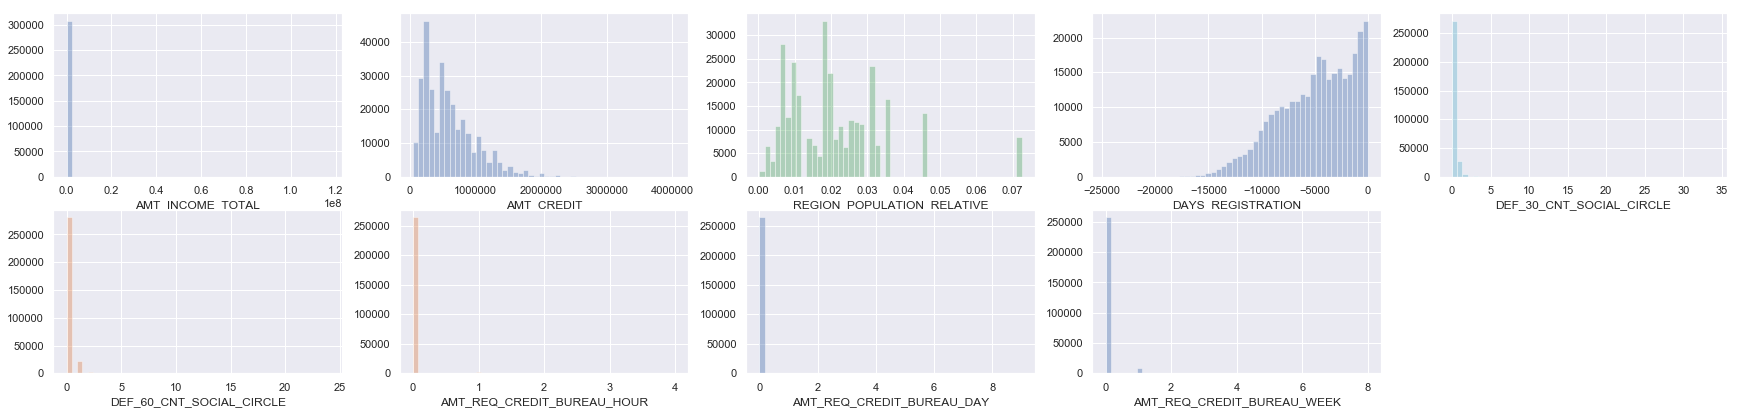

In [13]:
### Float特徵 視覺化:直方圖 (當無法畫圖時遞補，最後刪除無用的圖紙)
col_Fplt = 5
row_Fplt = int(featureFloat.shape[1]/col_Fplt)+1
fig,axes=plt.subplots(row_Fplt,col_Fplt,figsize=(30, 50))
r = 0
c = 0
for i in range(row_Fplt*col_Fplt):
    if i<featureFloat.shape[1]:
        try:
            sns.distplot(featureFloat.iloc[:,i],kde=False,ax = axes[r,c])
            c += 1
        except:
            print(f"第{i}特徵:{featureFloat.iloc[:,i].name} 型別:{featureFloat.iloc[:,i].dtype} 無法畫圖")
    else:
        for k in range(c,col_Fplt):
            axes[r,k].set_visible(False)
        for j in range(r+1,row_Fplt):
            for k in range(0,col_Fplt):
                axes[j,k].set_visible(False)
    
    if c== col_Fplt:
        c = 0
        r +=1

> <h3 style="color:red;">??為何部份的float數值資料無法畫直方圖</h3>

## 類別變數 視覺化:直方圖 (日後再補)